# Lab8 Assignment : Data Clustering

Stduent ID: 6131501066

Name: Arunwat Moonbung

### Problem: Cluster wholesale customer data into groups (clutomer segmentation).

This dataset has been modfied from http://archive.ics.uci.edu/ml/datasets/Wholesale+customers

The dataset contains variables from wholesale business.

#### Feature Description: They are the number that related to each type of orders. 
1. Channel: channel of purchase
2. Region: customer's region
3. Fresh: annual spending on fresh products
4. Milk: annual spending on milk products
5. Grocery: annual spending on grocery products
6. Frozen: annual spending on fresh products
7. Detergents_Paper: annual spending on detergents and paper  products
8. Delicassen: annual spending on delicatessen products


### 1. Read data from ‘Wholesale.csv’

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Wholesale.csv')

### 2. Basic Exploration & Data Cleaning & Feature Engineering (if any):

In [2]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Online,C,12669,9656,7561,214,2674,1338
1,Online,C,7057,9810,9568,1762,3293,1776
2,Online,C,6353,8808,7684,2405,3516,7844
3,InStore,C,13265,1196,4221,6404,507,1788
4,Online,C,22615,5410,7198,3915,1777,5185


#### 2.1 How many records and columns this data set has?

In [3]:
df.shape

(440, 8)

#### 2.2 What is the data type of each feature?

In [4]:
df.dtypes

Channel             object
Region              object
Fresh                int64
Milk                 int64
Grocery              int64
Frozen               int64
Detergents_Paper     int64
Delicassen           int64
dtype: object

#### 2.3 Data Cleaning:
Is there any missing value? If so, fix them.

In [5]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

#### 2.4 Feature Engineering: 
Is this dataset mixed-type data?, If so, transform all categorical to numeric.

In [6]:
display(df.dtypes)
display(df['Channel'].unique())
display(df['Region'].unique())

Channel             object
Region              object
Fresh                int64
Milk                 int64
Grocery              int64
Frozen               int64
Detergents_Paper     int64
Delicassen           int64
dtype: object

array(['Online', 'InStore'], dtype=object)

array(['C', 'A', 'B'], dtype=object)

In [7]:
#Seperate Categorical Data from the main dataframe (df)
cat_data = df[['Channel','Region']]
num_data = df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]
display(cat_data)
display(num_data)

,Channel,Region
0,Online,C
1,Online,C
2,Online,C
3,InStore,C
4,Online,C
...,...,...
435,InStore,C
436,InStore,C
437,Online,C
438,InStore,C


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [8]:
#Change Channel ['Online', 'InStore'] -> [0, 1] Boolean
# Online -> 0
# InStore -> 1

Channel_Boolean = {'Online':0,'InStore':1}
Channel = cat_data.Channel.apply(Channel_Boolean.get)
display(Channel)


0      0
1      0
2      0
3      1
4      0
      ..
435    1
436    1
437    0
438    1
439    1
Name: Channel, Length: 440, dtype: int64

In [9]:
#Region using One-hot Encoding
nominal_Region = cat_data['Region']
Region = pd.get_dummies(nominal_Region)
display(Region)


,A,B,C
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
435,0,0,1
436,0,0,1
437,0,0,1
438,0,0,1


In [10]:
df_v2 = pd.concat([Channel, Region, num_data],axis=1)
display(df_v2)

#df_v2 is the dataframe which pass the features transfromation :)

,Channel,A,B,C,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,0,0,1,12669,9656,7561,214,2674,1338
1,0,0,0,1,7057,9810,9568,1762,3293,1776
2,0,0,0,1,6353,8808,7684,2405,3516,7844
3,1,0,0,1,13265,1196,4221,6404,507,1788
4,0,0,0,1,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...,...
435,1,0,0,1,29703,12051,16027,13135,182,2204
436,1,0,0,1,39228,1431,764,4510,93,2346
437,0,0,0,1,14531,15488,30243,437,14841,1867
438,1,0,0,1,10290,1981,2232,1038,168,2125


#### 2.5 Should this dataset be normalized? If so, perform the normalization on this dataset. 

In [11]:
# Rescaling features into a range of [0,1]
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_v3 = mms.fit_transform(df_v2)
df_v3 = pd.DataFrame(df_v3, columns=df_v2.columns) 
df_v3.head()

,Channel,A,B,C,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.0,0.0,0.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.0,0.0,0.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.0,0.0,0.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,1.0,0.0,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.0,0.0,0.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


### 3.	Cluster the Wholesale data using K-means with k=2 and then report the accuracies (SSE and Silhouette Coefficient).

In [12]:
from sklearn.cluster import KMeans
kmeans_k2 = KMeans(n_clusters = 2)
cluster_labels = kmeans_k2.fit_predict(df_v3)

In [13]:
#Performance Evaluation using SSE
#Less = Good!
sse = kmeans_k2.inertia_ # Sum of squared distances of samples to their closest cluster center.
print("Sum of Squared Error (SSE): ", sse)

Sum of Squared Error (SSE):  179.3209997319956


In [14]:
#Performance Evaluation using Silhouette Coefficient

from sklearn.metrics import silhouette_score
silhouette_k2 = silhouette_score(df_v3, cluster_labels)
print(silhouette_k2)

### A higher Silhouette Coefficient score relates to a model with better defined clusters.
### More = Good!

0.5498960648864174


### 4.	What is the optimum (best) k value for the K-means model of this dataset? 

In [15]:
ks = range(1, 16) #1 to N-1 clusters
sse = [] #Array for collecting SSE data for each clusters!
silhouette_plot = []

for k in ks:
    kmeans = KMeans(n_clusters = k)#, random_state = 0)
    # Fit model to samples
    cluster_labels_ks = kmeans.fit(df_v3)
    # Append the inertia to the list of inertias
    sse.append(kmeans.inertia_)


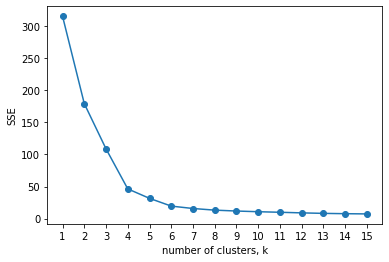

In [16]:
# Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!
# Plot ks vs inertias
plt.plot(ks, sse, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('SSE')
plt.xticks(ks)
plt.show()

### 5.	Create an optimum K-means model with the optimal k value.

#### K = 4 is the optimal K since the SSE started decrease slowly from the point.

In [17]:
#From the Elbow Methods using 4 is the optimal K 
kmeans_optimal = KMeans(n_clusters = 4)
result_kmeans = kmeans_optimal.fit_predict(df_v3)
col_names = list(df_v2.columns.values)

# append cluster labels to the last column of the dataset
df_result = pd.concat([pd.DataFrame(df_v2,columns=col_names), pd.DataFrame(result_kmeans,columns=['ClusterLabels']) ], axis=1)

#cluster label 0,1,2,3 (K=4)
df_result.head()

,Channel,A,B,C,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,ClusterLabels
0,0,0,0,1,12669,9656,7561,214,2674,1338,2
1,0,0,0,1,7057,9810,9568,1762,3293,1776,2
2,0,0,0,1,6353,8808,7684,2405,3516,7844,2
3,1,0,0,1,13265,1196,4221,6404,507,1788,1
4,0,0,0,1,22615,5410,7198,3915,1777,5185,2


#### 5.1 What is SSE of the optimal model?

In [18]:
sse_ = kmeans_optimal.inertia_ # Sum of squared distances of samples to their closest cluster center.
print("Sum of Squared Error (SSE): ", sse)

Sum of Squared Error (SSE):  [315.65606268648395, 179.3209997319956, 108.74418446279012, 46.27853567405925, 31.52287127609207, 19.41892817972529, 15.679164181072153, 13.129100808295881, 11.733181190386391, 10.656257033418145, 9.79697193280129, 8.849050448369264, 8.077481303779143, 7.571162587633196, 7.22815297272084]


#### 5.2 What is Silhouette Coefficient of the optimal model?

In [19]:
silhouette = silhouette_score(df_result, result_kmeans)
print(silhouette)

0.004240744204449487


#### 5.3 How many members for each clusters?

In [20]:
df_result["ClusterLabels"].value_counts()

1    211
2    105
0     77
3     47
Name: ClusterLabels, dtype: int64

#### 5.4 What are centroid data?

In [21]:
# Centriod for each cluster
print("Centroid data (Normalized):")
print(kmeans_optimal.cluster_centers_)
# Transform centroid data back to the original scale.
centriod = mms.inverse_transform(kmeans_optimal.cluster_centers_)
print("Centroid data (Original Feature Scales):")
print(centriod)

Centroid data (Normalized):
[[ 7.66233766e-01  1.00000000e+00  5.55111512e-17 -3.33066907e-16
   9.89650040e-02  7.39541629e-02  7.97619876e-02  4.89010858e-02
   6.48666687e-02  2.81997519e-02]
 [ 1.00000000e+00 -3.60822483e-16 -8.32667268e-17  1.00000000e+00
   1.23720906e-01  4.67298591e-02  4.18609634e-02  5.96920070e-02
   1.91966114e-02  3.16079341e-02]
 [-5.55111512e-16 -1.94289029e-16  4.16333634e-17  1.00000000e+00
   8.76386985e-02  1.48768562e-01  1.71926334e-01  2.44592729e-02
   1.68926075e-01  3.80310706e-02]
 [ 5.95744681e-01  8.32667268e-17  1.00000000e+00 -2.22044605e-16
   8.81396088e-02  6.85316533e-02  9.93306072e-02  6.60765515e-02
   9.02525006e-02  2.41281211e-02]]
Centroid data (Original Feature Scales):
[[ 7.66233766e-01  1.00000000e+00  5.55111512e-17 -3.33066907e-16
   1.11017273e+04  5.48641558e+03  7.40307792e+03  3.00033766e+03
   2.65111688e+03  1.35489610e+03]
 [ 1.00000000e+00 -3.60822483e-16 -8.32667268e-17  1.00000000e+00
   1.38780521e+04  3.48698104

### 6.	Save data together with its cluster label into file named ‘Wholesale_clusters.csv’

In [22]:
df_result.to_csv('Wholesale_clusters.csv')